In [2]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

from warnings import filterwarnings
filterwarnings("ignore")
sns.set_style("darkgrid")  # 'white', 'dark', 'whitegrid', 'darkgrid', 'ticks'

In [3]:
cali_df_temp = fetch_california_housing(as_frame=True)

cali_housing_samples : pd.DataFrame = cali_df_temp['data']
cali_housing_targets : pd.DataFrame = cali_df_temp['target']

calif_df : pd.DataFrame= cali_df_temp.frame

In [5]:

# the model: Random Forest
model = RandomForestRegressor(
    n_estimators=100,
    criterion='squared_error',
    max_features='sqrt',
    random_state=100
)

# parameter grid for the grid
param_grid = {
    'max_depth': [5, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 5],

}

# grid search init
grid = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=3,
    n_jobs=-1,  # use all cpu
    verbose=1,
)

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    cali_housing_samples, cali_housing_targets, test_size=0.2, random_state=100, shuffle=True
)

# fit the grid to the trainig data
grid.fit(X_train.astype(np.float32), y_train.astype(np.float32))

Fitting 3 folds for each of 8 candidates, totalling 24 fits


GridSearchCV(cv=3,
             estimator=RandomForestRegressor(max_features='sqrt',
                                             random_state=100),
             n_jobs=-1,
             param_grid={'max_depth': [5, 10], 'min_samples_leaf': [1, 5],
                         'min_samples_split': [2, 5]},
             verbose=1)

In [6]:
best_params : dict = grid.best_params_
print(best_params)

random_forest = RandomForestRegressor(
    n_estimators=100,
    max_features='sqrt',
    criterion='squared_error',

    # These parameters led to overfit (very low training mse 0.03 and higher testing mse 0.21)

    # max_depth=best_params['max_depth'],
    # min_samples_leaf=best_params['min_samples_leaf'],
    # min_samples_split=best_params['min_samples_split'],

    max_depth=20,
    min_samples_leaf=4,
    min_samples_split=2,

)

random_forest.fit(X_train.astype(np.float64), y_train.astype(np.float64))

testing_predictions = random_forest.predict(X_test)
training_predictions = random_forest.predict(X_train)

print(random_forest.get_params())

print(f'\n\nTraining R2 score: {r2_score(y_train, training_predictions):.2f}')
print(f'Testing R2 score:  {r2_score(y_test, testing_predictions):.2f}')

print(f'\nTraining mse:  {mean_squared_error(y_train, training_predictions):.2f}')
print(f'Testing mse: {mean_squared_error(y_test, testing_predictions):.2f}')

{'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}
{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': 20, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 4, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


Training R2 score: 0.91
Testing R2 score:  0.82

Training mse:  0.13
Testing mse: 0.24


In [15]:
r_squared = r2_score(y_test, testing_predictions)
mse = mean_squared_error(y_test, testing_predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, testing_predictions)

print(f'\nR2 score: {r_squared:.2f}')
print(f'Mean squared error: {mse:.2f}')
print(f'Root mean square error: {rmse:.2f}')
print(f'Mean absolute error: {mae:.2f}')


R2 score: 0.82
Mean squared error: 0.24
Root mean square error: 0.49
Mean absolute error: 0.33


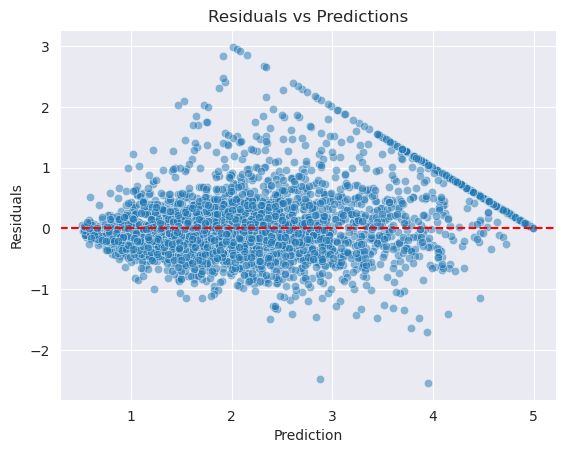

In [18]:
residuals = y_test - testing_predictions

sns.scatterplot(x=testing_predictions, y=residuals, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.title("Residuals vs Predictions")
plt.xlabel("Prediction")
plt.ylabel("Residuals")
plt.show()

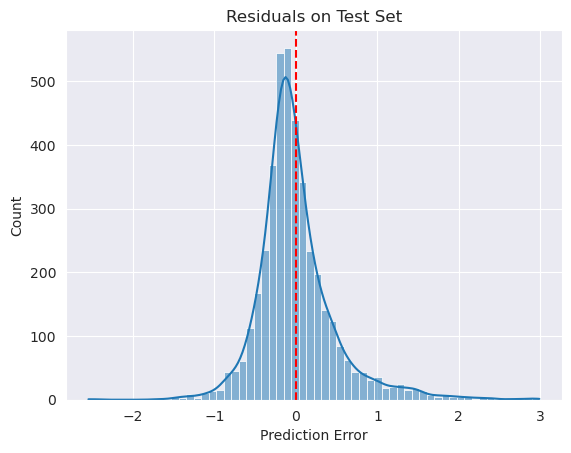

In [19]:
residuals = y_test - testing_predictions

sns.histplot(residuals, bins=60, kde=True)
plt.axvline(x=0, color='red', linestyle='--')
plt.title("Residuals on Test Set")
plt.xlabel("Prediction Error")
plt.ylabel("Count")
plt.show()

            Importance
MedInc        0.382468
Latitude      0.142804
Longitude     0.142757
AveOccup      0.117676
AveRooms      0.105638
HouseAge      0.051221
AveBedrms     0.033426
Population    0.024010


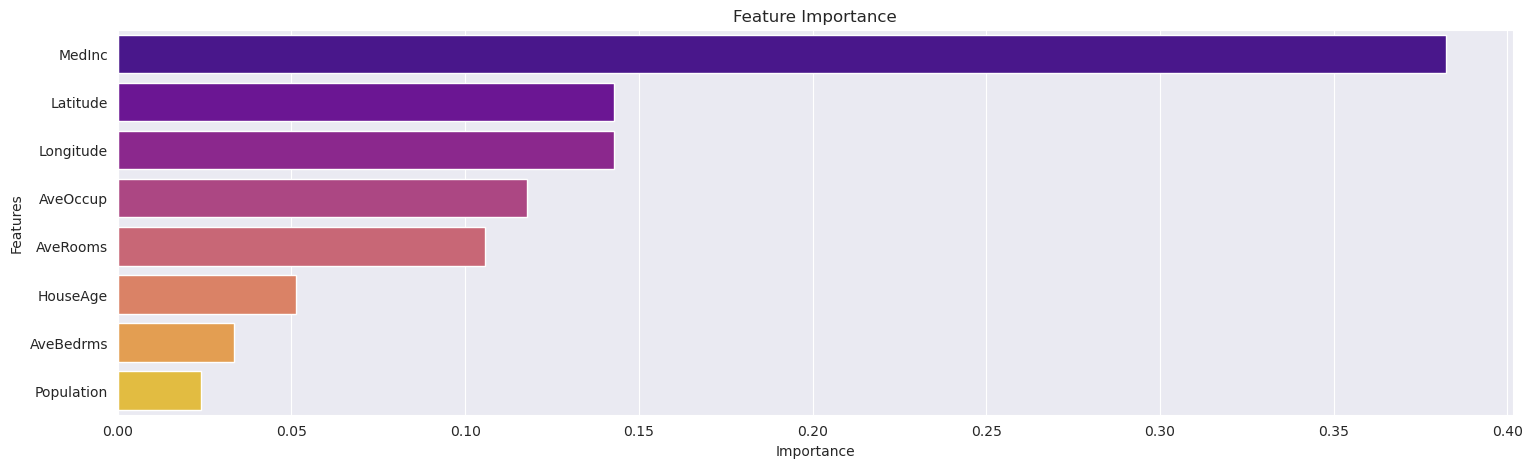

In [17]:
importance_df = pd.DataFrame(data={'Importance': random_forest.feature_importances_}, index=random_forest.feature_names_in_).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(18, 5))
sns.barplot(y=importance_df.index, x=importance_df.Importance, palette='plasma')
plt.title('Feature Importance')
plt.ylabel('Features')

print(importance_df)